In [539]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [460]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.shape

(284, 3)

In [461]:
df.value_counts()

Age  Salary  Purchased
41   72000   0            4
48   33000   1            2
49   28000   1            2
32   18000   0            2
28   59000   0            2
                         ..
36   99000   1            1
     63000   0            1
     60000   0            1
     54000   0            1
37   33000   0            1
Name: count, Length: 268, dtype: int64

In [462]:
df.describe()

,Age,Salary,Purchased
count,284.000000,284.000000,284.000000
mean,40.746479,73535.211268,0.500000
std,10.196609,36214.254846,0.500883
min,18.000000,16000.000000,0.000000
25%,35.000000,43750.000000,0.000000
50%,40.000000,72000.000000,0.500000
75%,48.000000,96000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [463]:
# to check correlation use ANOVA test because purchased is a categorical numerical column.

from scipy.stats import f_oneway


In [464]:
# H0 - No correlation
# H1 - Is correlation

grpAge = df.groupby('Purchased')['Age']

p = f_oneway(*grpAge.apply(list))[1]

round(p,3)

np.float64(0.0)

In [465]:
grpSalary = df.groupby('Purchased')['Salary']
p2 = f_oneway(*grpSalary.apply(list))[1]
round(p2,3)

np.float64(0.0)

In [466]:
# Reject Null Hypothesis means there is correlation between Age to Purchased and Salary to Purchased.


In [467]:
# The salaries are on the scale of 1000s so we can do :
#  1) standardized scaling  ( z - score scaling)
#  2) MinMax scaling

# because model can give more importance to salary than age because of it's magnitude.


In [468]:
# Here in this example we will do Z - score scaling

# z = ( x - mean ) /  std

# output is in range of -3 to 3 because data should lie between mean + 3 std  and mean - 3 std

# anything smaller / greater than that is outlier


In [469]:
# In Minmax scaling it is between 0 and 1

# The transformation is given by:

#    scaling the original data ->               X_std = (X - X.min) / (X.max - X.min)

#    rescaling the data to get original form -> X_scaled = X_std * (max - min) + min

# X.min means min value of X
# likewise,

In [470]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [471]:
x = df.drop('Purchased',axis=1).values
y = df['Purchased'].values

print(x.shape,y.shape)

(284, 2) (284,)


In [472]:
sc = StandardScaler()
xsc = sc.fit_transform(x)
# fit calculates mean and std of both columns of the df

xsc.shape

(284, 2)

In [473]:
xsc[0:5]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064],
       [-1.44876691, -0.8446705 ],
       [ 0.6143768 , -1.34258974],
       [-1.35052197, -0.45739999]])

In [474]:
sc.inverse_transform(xsc[0:5])

array([[   19., 19000.],
       [   35., 20000.],
       [   26., 43000.],
       [   47., 25000.],
       [   27., 57000.]])

In [475]:
from sklearn.model_selection import train_test_split

In [476]:
from sklearn.linear_model import LogisticRegression

In [477]:
xtrain,xtest,ytrain,ytest = train_test_split(xsc,y,test_size=0.2,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(227, 2) (57, 2) (227,) (57,)


In [478]:
model = LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)  # It will internally call predict and accuracy_score

0.8070175438596491

In [479]:
# slash is used not to end line
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report, ConfusionMatrixDisplay

In [480]:
yhat = model.predict(xtest)
accuracy_score(ytest,yhat)

0.8070175438596491

In [481]:
cm = confusion_matrix(ytest,yhat) ; cm

array([[19,  5],
       [ 6, 27]])

In [482]:
# correct predictions of class 0 are 19, 1 are 27
# we tested 57 rows
# where there is 0 and predicted is also 0 the count is 19
# where there is 1 and predicted is also 1 the count is 27
# where these is 0 but predicted is 1 the count is 5
# where these is 1 but predicted is 0 the count is 6


In [483]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.84      0.82      0.83        33

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57



In [484]:
# for 0 : precision -> 19 / 25 = 0.76
#         recall    -> 19 / 24 = 0.79

# for 1 : precision -> 27 / 32 = 0.84
#         recall    -> 27 / 33 = 0.82

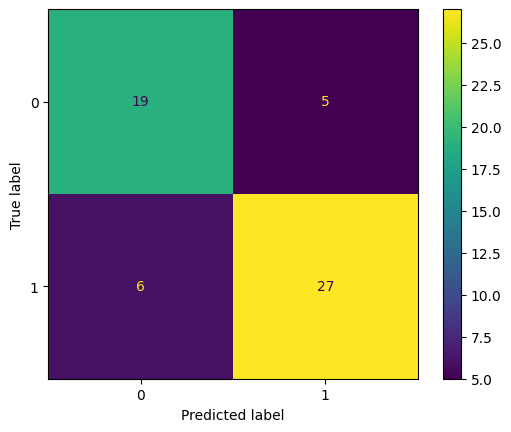

In [485]:
ConfusionMatrixDisplay(cm).plot()

In [486]:
yhat  # by default it takes 0.5 as threshold

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [487]:
# here we will get prediction as a probability
yprob = model.predict_proba(xtest)  ; yprob

array([[0.3452336 , 0.6547664 ],
       [0.76664417, 0.23335583],
       [0.01511805, 0.98488195],
       [0.40228181, 0.59771819],
       [0.27233734, 0.72766266],
       [0.06822834, 0.93177166],
       [0.08294356, 0.91705644],
       [0.42459963, 0.57540037],
       [0.96476776, 0.03523224],
       [0.42399803, 0.57600197],
       [0.9868855 , 0.0131145 ],
       [0.07591705, 0.92408295],
       [0.78256627, 0.21743373],
       [0.7400917 , 0.2599083 ],
       [0.69030243, 0.30969757],
       [0.18955314, 0.81044686],
       [0.47540811, 0.52459189],
       [0.61292301, 0.38707699],
       [0.96867646, 0.03132354],
       [0.18704363, 0.81295637],
       [0.1048061 , 0.8951939 ],
       [0.03392805, 0.96607195],
       [0.67948119, 0.32051881],
       [0.59800426, 0.40199574],
       [0.01748635, 0.98251365],
       [0.52529807, 0.47470193],
       [0.42379755, 0.57620245],
       [0.63946458, 0.36053542],
       [0.02016931, 0.97983069],
       [0.07077872, 0.92922128],
       [0.

In [488]:
yhat

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [489]:
yhat2 = (yprob[:,1]>=0.5)  ; yhat2

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False, False, False, False,  True,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True,  True, False,
       False,  True, False])

In [490]:
yhat2 = (yprob[:,1]>=0.5).astype(int)  ; yhat2

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [491]:
(yhat == yhat2).sum()

np.int64(57)

81.0 % accuracy
              precision    recall  f1-score   support

           0       0.76      0.79      0.78        24
           1       0.84      0.82      0.83        33

    accuracy                           0.81        57
   macro avg       0.80      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

[[19  5]
 [ 6 27]]


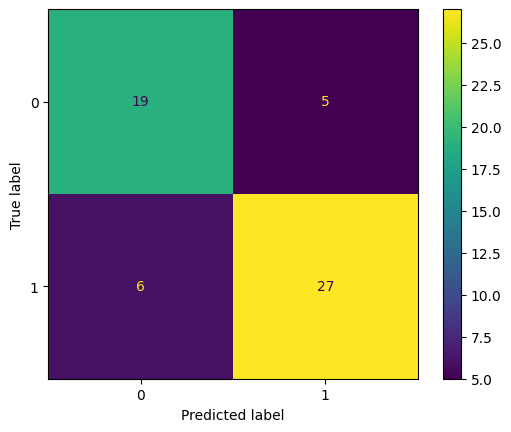

In [492]:
print(round(accuracy_score(ytest,yhat2),2) * 100, "% accuracy")

print(classification_report(ytest,yhat2))
cm = confusion_matrix(ytest,yhat2) ;
print(cm)
ConfusionMatrixDisplay(cm).plot()

In [493]:
x = sc.transform([[45,100000]])
x

array([[0.41788692, 0.73207374]])

In [494]:
model.predict(x)

array([1])

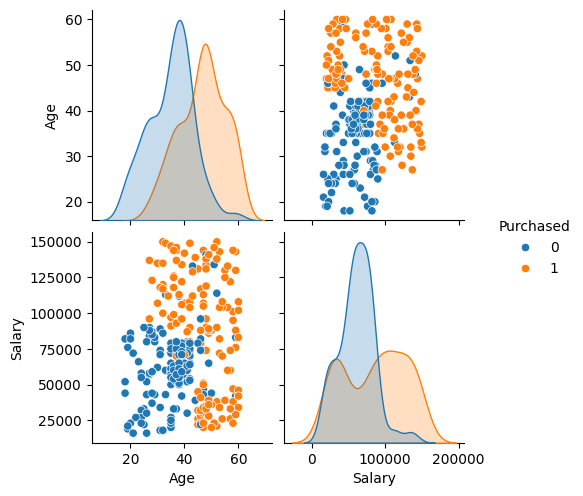

In [495]:
import seaborn as sns
sns.pairplot(df, hue='Purchased')

In [496]:
model.predict(sc.transform([[25,75000]]))


array([0])

In [497]:
model.predict(sc.transform([[40,78423]]))


array([1])

In [498]:
model.predict(sc.transform([[40,78422]]))


array([0])

In [499]:
# Plot decision boundary

In [500]:
age = np.arange(np.min(xtest[:,0])-0.2, np.max(xtest[:,0])+0.2, 0.05)
salary = np.arange(np.min(xtest[:,1])-0.2, np.max(xtest[:,1])+0.2, 0.05)

# here -0.2 and +0.2 is just for padding so our plot's curves do not touch the axes.

AGE,SAL = np.meshgrid(age,salary)
print(AGE.shape, SAL.shape)

# In X rows values' are same
# In Y column values' are same

(80, 89) (80, 89)


In [501]:
# Now we've got a mesh square with very fine grids
# And we need to flatten it,
# means every all rows will become 1 single row,

# ex.
# 1 2 3
# 4 5 6
# 7 8 9

# flatten -> [1 2 3 4 5 6 7 8 9]


In [503]:
feature1 = AGE.ravel()
feature2 = SAL.ravel()

test_vals = np.c_[feature1,feature2]
test_vals.shape

(7120, 2)

In [506]:
# concatenate as per model's need and reshape to 2D shape so that contour can be plot
# get predicted answers
pred_ans = model.predict(test_vals).reshape(AGE.shape)
pred_ans.shape

(80, 89)

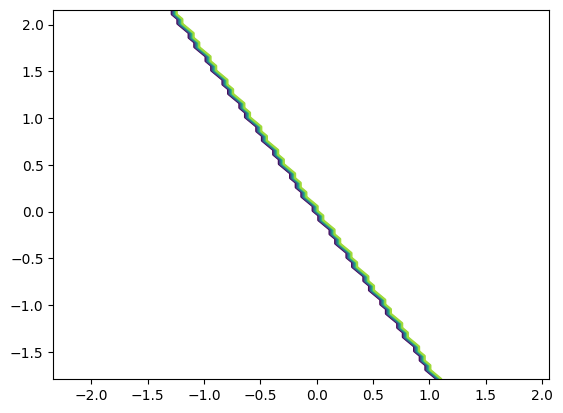

In [518]:
plt.contour(AGE,SAL,pred_ans)


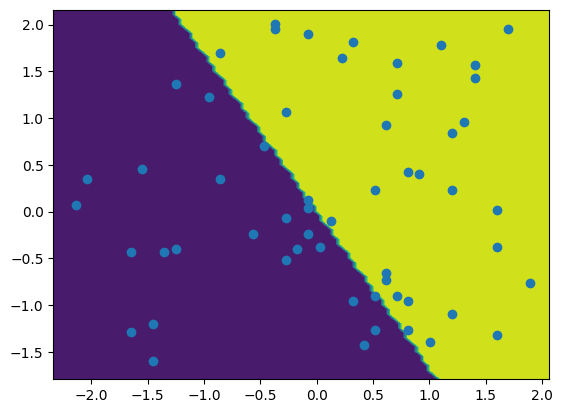

In [528]:
plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[:,0],xtest[:,1])  # These are our 57 data points

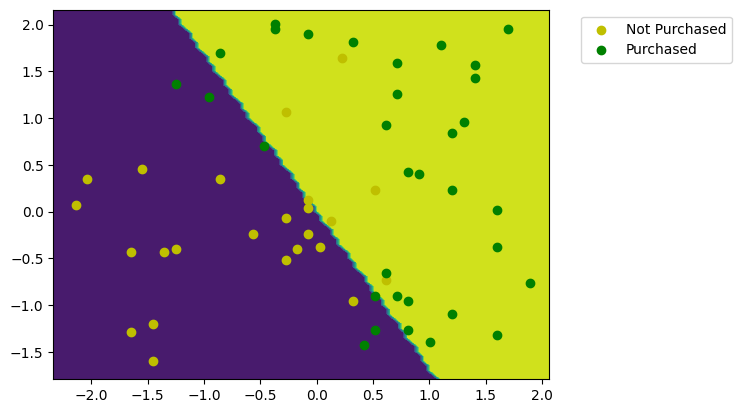

In [532]:
plt.contourf(AGE,SAL,pred_ans)

plt.scatter(xtest[ytest==0,0],xtest[ytest==0,1], c='y',label='Not Purchased')
plt.scatter(xtest[ytest==1,0],xtest[ytest==1,1], c='g',label='Purchased')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

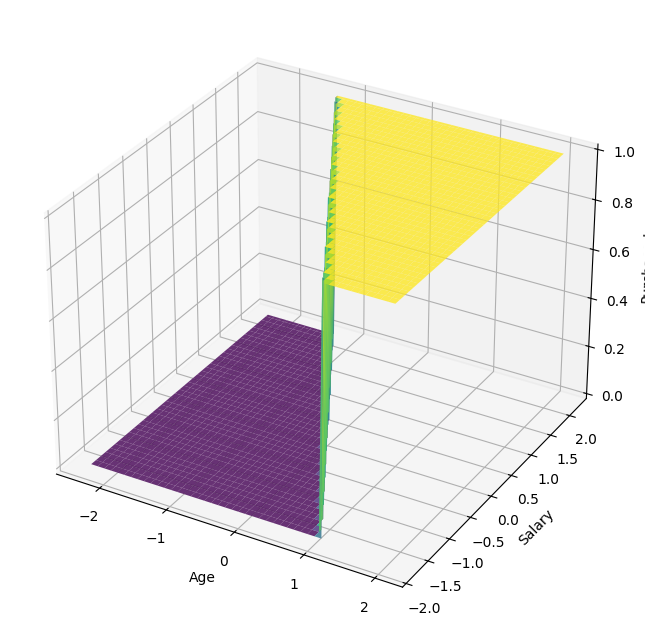

In [515]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_zlabel('Purchased')

ax.plot_surface(AGE,SAL,pred_ans, cmap='viridis', alpha=0.8)  # here 'alpha=0.8' means transparency
